In [1]:
import os
import glob
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
config = mr.TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 10.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [7]:
work_path = os.path.join("E:", os.sep, "RCNNPipes512Train")

os.chdir(work_path)

tif_glob = glob.glob(os.path.join("*", "images", "*.tif"))
n = int(len(tif_glob) * .8)

ds_train = mr.MRDataset()
ds_train.load_glob(tif_glob[:n])
ds_train.prepare()

ds_valid = mr.MRDataset()
ds_valid.load_glob(tif_glob[n:])
ds_valid.prepare()

In [8]:
len(tif_glob)

18094

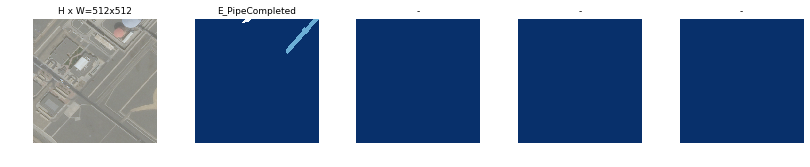

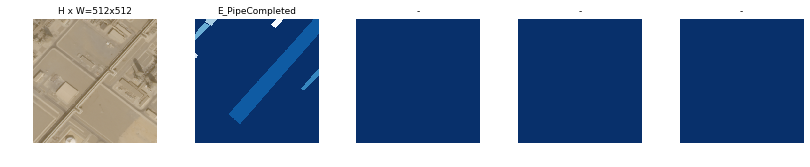

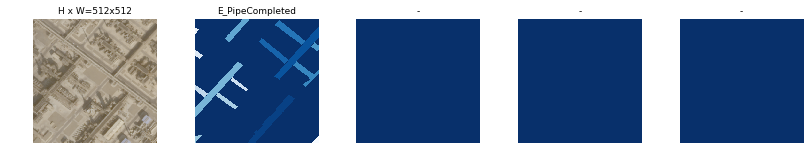

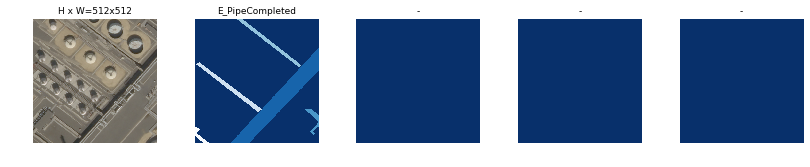

In [9]:
image_ids = np.random.choice(ds_train.image_ids,4)
for image_id in image_ids:
    image = ds_train.load_image(image_id)
    mask, class_ids = ds_train.load_mask(image_id)
    visualize.display_top_masks(image,mask,class_ids,ds_train.class_names)

In [10]:
model = modellib.MaskRCNN(mode="training",
                          config=config,
                          model_dir="logs")

In [11]:
# Which weights to start with?
init_with = "imagenet"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(mr.COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits",
                                "mrcnn_bbox_fc", 
                                "mrcnn_bbox",
                                "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model_path = model.find_last()
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)

In [12]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE, 
            epochs=60, 
            layers='heads')


Starting at epoch 0. LR=0.0001

Checkpoint Path: logs\mr20190518T1148\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/60
50/50 [==============================] - 91s 2s/step - loss: 12.0299 - rpn_class_loss: 1.2416 - rpn_bbox_loss: 3.1410 - mrcnn_class_loss: 0.2356 - mrcnn_bbox_loss: 0.9641 - mrcnn_mask_loss: 6.4476 - val_loss: 11.3763 - val_rpn_class_loss: 0.7130 - val_rpn_bbox_loss: 3.6481 - val_mrcnn_class_loss: 0.1617 - val_mrcnn_bbox_loss: 0.8072 - val_mrcnn_mask_loss: 6.0462
Epoch 2/60
50/50 [==============================] - 76s 2s/step - loss: 10.0508 - rpn_class_loss: 0.5690 - rpn_bbox_loss: 2.7645 - mrcnn_class_loss: 0.1565 - mrcnn_bbox_loss: 0.7847 - mrcnn_mask_loss: 5.7761 - val_loss: 9.6160 - val_rpn_class_loss: 0.5344 - val_rpn_bbox_loss: 2.4655 - val_mrcnn_class_loss: 0.1958 - val_mrcnn_bbox_loss: 0.7425 - val_mrcnn_mask_loss: 5.6778
Epoch 3/60
50/50 [==============================] - 77s 2s/step - loss: 9.2396 - rpn_class_loss: 0.4815 - rpn_bbox_loss: 2.3536 - mrcnn_class_loss: 0.1951 - mrcnn_bbox_loss: 0.7610 - mrcnn_mask_loss: 5.4484 - val_loss: 9.5859 - val_rpn_class_loss: 0

Epoch 23/60
50/50 [==============================] - 86s 2s/step - loss: 6.6942 - rpn_class_loss: 0.2168 - rpn_bbox_loss: 1.5730 - mrcnn_class_loss: 0.2332 - mrcnn_bbox_loss: 0.5578 - mrcnn_mask_loss: 4.1134 - val_loss: 6.7666 - val_rpn_class_loss: 0.2235 - val_rpn_bbox_loss: 1.6462 - val_mrcnn_class_loss: 0.2287 - val_mrcnn_bbox_loss: 0.5527 - val_mrcnn_mask_loss: 4.1156
Epoch 24/60
50/50 [==============================] - 88s 2s/step - loss: 6.9163 - rpn_class_loss: 0.2459 - rpn_bbox_loss: 1.8896 - mrcnn_class_loss: 0.2555 - mrcnn_bbox_loss: 0.5537 - mrcnn_mask_loss: 3.9716 - val_loss: 6.8900 - val_rpn_class_loss: 0.1895 - val_rpn_bbox_loss: 1.9553 - val_mrcnn_class_loss: 0.2406 - val_mrcnn_bbox_loss: 0.5525 - val_mrcnn_mask_loss: 3.9522
Epoch 25/60
50/50 [==============================] - 86s 2s/step - loss: 6.6937 - rpn_class_loss: 0.2272 - rpn_bbox_loss: 1.7945 - mrcnn_class_loss: 0.2206 - mrcnn_bbox_loss: 0.5510 - mrcnn_mask_loss: 3.9005 - val_loss: 6.6015 - val_rpn_class_loss: 0

Epoch 45/60
50/50 [==============================] - 91s 2s/step - loss: 5.8868 - rpn_class_loss: 0.1835 - rpn_bbox_loss: 1.4044 - mrcnn_class_loss: 0.2255 - mrcnn_bbox_loss: 0.4824 - mrcnn_mask_loss: 3.5910 - val_loss: 5.8286 - val_rpn_class_loss: 0.2106 - val_rpn_bbox_loss: 1.2420 - val_mrcnn_class_loss: 0.2602 - val_mrcnn_bbox_loss: 0.4847 - val_mrcnn_mask_loss: 3.6312
Epoch 46/60
50/50 [==============================] - 89s 2s/step - loss: 6.0164 - rpn_class_loss: 0.1925 - rpn_bbox_loss: 1.5185 - mrcnn_class_loss: 0.2217 - mrcnn_bbox_loss: 0.4783 - mrcnn_mask_loss: 3.6054 - val_loss: 6.0820 - val_rpn_class_loss: 0.1974 - val_rpn_bbox_loss: 1.6065 - val_mrcnn_class_loss: 0.2015 - val_mrcnn_bbox_loss: 0.4692 - val_mrcnn_mask_loss: 3.6075
Epoch 47/60
50/50 [==============================] - 87s 2s/step - loss: 6.0815 - rpn_class_loss: 0.1974 - rpn_bbox_loss: 1.5760 - mrcnn_class_loss: 0.1990 - mrcnn_bbox_loss: 0.4795 - mrcnn_mask_loss: 3.6295 - val_loss: 5.4986 - val_rpn_class_loss: 0

In [13]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE / 10.0,
            epochs=120, 
            layers="4+")


Starting at epoch 60. LR=1e-05

Checkpoint Path: logs\mr20190518T1148\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2b          (BatchNorm)
res4d_branch2c         (Conv2D)
bn4d_branch2c          (BatchNorm)
res4

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 61/120
50/50 [==============================] - 108s 2s/step - loss: 5.7540 - rpn_class_loss: 0.1656 - rpn_bbox_loss: 1.3735 - mrcnn_class_loss: 0.1928 - mrcnn_bbox_loss: 0.4469 - mrcnn_mask_loss: 3.5752 - val_loss: 5.6243 - val_rpn_class_loss: 0.1524 - val_rpn_bbox_loss: 1.2703 - val_mrcnn_class_loss: 0.1834 - val_mrcnn_bbox_loss: 0.4487 - val_mrcnn_mask_loss: 3.5695
Epoch 62/120
50/50 [==============================] - 91s 2s/step - loss: 5.7185 - rpn_class_loss: 0.1677 - rpn_bbox_loss: 1.3571 - mrcnn_class_loss: 0.1964 - mrcnn_bbox_loss: 0.4528 - mrcnn_mask_loss: 3.5445 - val_loss: 6.2800 - val_rpn_class_loss: 0.1562 - val_rpn_bbox_loss: 1.7393 - val_mrcnn_class_loss: 0.1513 - val_mrcnn_bbox_loss: 0.4625 - val_mrcnn_mask_loss: 3.7706
Epoch 63/120
50/50 [==============================] - 90s 2s/step - loss: 5.7446 - rpn_class_loss: 0.1523 - rpn_bbox_loss: 1.4740 - mrcnn_class_loss: 0.1844 - mrcnn_bbox_loss: 0.4545 - mrcnn_mask_loss: 3.4793 - val_loss: 6.0498 - val_rpn_class_los

Epoch 83/120
50/50 [==============================] - 90s 2s/step - loss: 5.9839 - rpn_class_loss: 0.1571 - rpn_bbox_loss: 1.7691 - mrcnn_class_loss: 0.1860 - mrcnn_bbox_loss: 0.4448 - mrcnn_mask_loss: 3.4269 - val_loss: 5.8251 - val_rpn_class_loss: 0.1771 - val_rpn_bbox_loss: 1.5546 - val_mrcnn_class_loss: 0.2110 - val_mrcnn_bbox_loss: 0.4496 - val_mrcnn_mask_loss: 3.4327
Epoch 84/120
50/50 [==============================] - 92s 2s/step - loss: 5.6748 - rpn_class_loss: 0.1481 - rpn_bbox_loss: 1.4648 - mrcnn_class_loss: 0.2039 - mrcnn_bbox_loss: 0.4419 - mrcnn_mask_loss: 3.4160 - val_loss: 6.4315 - val_rpn_class_loss: 0.2070 - val_rpn_bbox_loss: 2.0639 - val_mrcnn_class_loss: 0.1890 - val_mrcnn_bbox_loss: 0.4553 - val_mrcnn_mask_loss: 3.5163
Epoch 85/120
50/50 [==============================] - 93s 2s/step - loss: 5.9475 - rpn_class_loss: 0.1873 - rpn_bbox_loss: 1.7296 - mrcnn_class_loss: 0.2066 - mrcnn_bbox_loss: 0.4497 - mrcnn_mask_loss: 3.3742 - val_loss: 5.8597 - val_rpn_class_loss

Epoch 105/120
50/50 [==============================] - 90s 2s/step - loss: 5.9005 - rpn_class_loss: 0.1616 - rpn_bbox_loss: 1.7969 - mrcnn_class_loss: 0.1867 - mrcnn_bbox_loss: 0.4417 - mrcnn_mask_loss: 3.3136 - val_loss: 5.2219 - val_rpn_class_loss: 0.1246 - val_rpn_bbox_loss: 1.0339 - val_mrcnn_class_loss: 0.1691 - val_mrcnn_bbox_loss: 0.4416 - val_mrcnn_mask_loss: 3.4527
Epoch 106/120
50/50 [==============================] - 92s 2s/step - loss: 5.2925 - rpn_class_loss: 0.1506 - rpn_bbox_loss: 1.2121 - mrcnn_class_loss: 0.1910 - mrcnn_bbox_loss: 0.4368 - mrcnn_mask_loss: 3.3020 - val_loss: 4.8016 - val_rpn_class_loss: 0.1348 - val_rpn_bbox_loss: 0.8737 - val_mrcnn_class_loss: 0.1614 - val_mrcnn_bbox_loss: 0.4299 - val_mrcnn_mask_loss: 3.2018
Epoch 107/120
50/50 [==============================] - 90s 2s/step - loss: 5.7786 - rpn_class_loss: 0.1490 - rpn_bbox_loss: 1.5452 - mrcnn_class_loss: 0.1992 - mrcnn_bbox_loss: 0.4425 - mrcnn_mask_loss: 3.4427 - val_loss: 5.5627 - val_rpn_class_l

In [14]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE / 50.0,
            epochs=300, 
            layers="all")


Starting at epoch 120. LR=2e-06

Checkpoint Path: logs\mr20190518T1148\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (BatchNorm)
res

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 121/300
50/50 [==============================] - 121s 2s/step - loss: 5.9504 - rpn_class_loss: 0.1644 - rpn_bbox_loss: 1.8028 - mrcnn_class_loss: 0.1969 - mrcnn_bbox_loss: 0.4396 - mrcnn_mask_loss: 3.3466 - val_loss: 6.4454 - val_rpn_class_loss: 0.1915 - val_rpn_bbox_loss: 2.1407 - val_mrcnn_class_loss: 0.2095 - val_mrcnn_bbox_loss: 0.4379 - val_mrcnn_mask_loss: 3.4658
Epoch 122/300
50/50 [==============================] - 99s 2s/step - loss: 6.0079 - rpn_class_loss: 0.1613 - rpn_bbox_loss: 1.7863 - mrcnn_class_loss: 0.2012 - mrcnn_bbox_loss: 0.4296 - mrcnn_mask_loss: 3.4295 - val_loss: 6.2972 - val_rpn_class_loss: 0.1640 - val_rpn_bbox_loss: 2.1088 - val_mrcnn_class_loss: 0.1952 - val_mrcnn_bbox_loss: 0.4323 - val_mrcnn_mask_loss: 3.3969
Epoch 123/300
50/50 [==============================] - 101s 2s/step - loss: 5.7744 - rpn_class_loss: 0.1746 - rpn_bbox_loss: 1.6716 - mrcnn_class_loss: 0.2039 - mrcnn_bbox_loss: 0.4251 - mrcnn_mask_loss: 3.2991 - val_loss: 6.0781 - val_rpn_class

Epoch 143/300
50/50 [==============================] - 96s 2s/step - loss: 5.3123 - rpn_class_loss: 0.1570 - rpn_bbox_loss: 1.2255 - mrcnn_class_loss: 0.1824 - mrcnn_bbox_loss: 0.4303 - mrcnn_mask_loss: 3.3171 - val_loss: 5.4388 - val_rpn_class_loss: 0.1749 - val_rpn_bbox_loss: 1.3030 - val_mrcnn_class_loss: 0.1992 - val_mrcnn_bbox_loss: 0.4490 - val_mrcnn_mask_loss: 3.3127
Epoch 144/300
50/50 [==============================] - 97s 2s/step - loss: 5.5746 - rpn_class_loss: 0.1566 - rpn_bbox_loss: 1.4599 - mrcnn_class_loss: 0.2000 - mrcnn_bbox_loss: 0.4289 - mrcnn_mask_loss: 3.3291 - val_loss: 4.9228 - val_rpn_class_loss: 0.1093 - val_rpn_bbox_loss: 0.8398 - val_mrcnn_class_loss: 0.1665 - val_mrcnn_bbox_loss: 0.4315 - val_mrcnn_mask_loss: 3.3758
Epoch 145/300
50/50 [==============================] - 99s 2s/step - loss: 5.4537 - rpn_class_loss: 0.1502 - rpn_bbox_loss: 1.3394 - mrcnn_class_loss: 0.2053 - mrcnn_bbox_loss: 0.4304 - mrcnn_mask_loss: 3.3283 - val_loss: 5.4924 - val_rpn_class_l

Epoch 165/300
50/50 [==============================] - 97s 2s/step - loss: 5.2885 - rpn_class_loss: 0.1429 - rpn_bbox_loss: 1.1527 - mrcnn_class_loss: 0.1959 - mrcnn_bbox_loss: 0.4349 - mrcnn_mask_loss: 3.3622 - val_loss: 5.4044 - val_rpn_class_loss: 0.1723 - val_rpn_bbox_loss: 1.0807 - val_mrcnn_class_loss: 0.2184 - val_mrcnn_bbox_loss: 0.4323 - val_mrcnn_mask_loss: 3.5008
Epoch 166/300
50/50 [==============================] - 97s 2s/step - loss: 5.6612 - rpn_class_loss: 0.1614 - rpn_bbox_loss: 1.5431 - mrcnn_class_loss: 0.2009 - mrcnn_bbox_loss: 0.4287 - mrcnn_mask_loss: 3.3272 - val_loss: 5.1800 - val_rpn_class_loss: 0.1568 - val_rpn_bbox_loss: 1.1539 - val_mrcnn_class_loss: 0.1768 - val_mrcnn_bbox_loss: 0.4354 - val_mrcnn_mask_loss: 3.2572
Epoch 167/300
50/50 [==============================] - 96s 2s/step - loss: 5.4619 - rpn_class_loss: 0.1589 - rpn_bbox_loss: 1.4763 - mrcnn_class_loss: 0.1829 - mrcnn_bbox_loss: 0.4218 - mrcnn_mask_loss: 3.2220 - val_loss: 5.9604 - val_rpn_class_l

Epoch 187/300
50/50 [==============================] - 99s 2s/step - loss: 5.5770 - rpn_class_loss: 0.1553 - rpn_bbox_loss: 1.5090 - mrcnn_class_loss: 0.1983 - mrcnn_bbox_loss: 0.4286 - mrcnn_mask_loss: 3.2858 - val_loss: 5.9238 - val_rpn_class_loss: 0.1683 - val_rpn_bbox_loss: 1.8229 - val_mrcnn_class_loss: 0.2112 - val_mrcnn_bbox_loss: 0.4299 - val_mrcnn_mask_loss: 3.2915
Epoch 188/300
50/50 [==============================] - 98s 2s/step - loss: 5.5115 - rpn_class_loss: 0.1527 - rpn_bbox_loss: 1.4267 - mrcnn_class_loss: 0.1858 - mrcnn_bbox_loss: 0.4223 - mrcnn_mask_loss: 3.3241 - val_loss: 5.9801 - val_rpn_class_loss: 0.1783 - val_rpn_bbox_loss: 1.6415 - val_mrcnn_class_loss: 0.2030 - val_mrcnn_bbox_loss: 0.4204 - val_mrcnn_mask_loss: 3.5369
Epoch 189/300
50/50 [==============================] - 99s 2s/step - loss: 6.1333 - rpn_class_loss: 0.1623 - rpn_bbox_loss: 1.9208 - mrcnn_class_loss: 0.1991 - mrcnn_bbox_loss: 0.4306 - mrcnn_mask_loss: 3.4206 - val_loss: 5.5624 - val_rpn_class_l

Epoch 209/300
50/50 [==============================] - 97s 2s/step - loss: 5.3864 - rpn_class_loss: 0.1459 - rpn_bbox_loss: 1.2383 - mrcnn_class_loss: 0.1864 - mrcnn_bbox_loss: 0.4310 - mrcnn_mask_loss: 3.3847 - val_loss: 5.5412 - val_rpn_class_loss: 0.1502 - val_rpn_bbox_loss: 1.3904 - val_mrcnn_class_loss: 0.1862 - val_mrcnn_bbox_loss: 0.4423 - val_mrcnn_mask_loss: 3.3722
Epoch 210/300
50/50 [==============================] - 97s 2s/step - loss: 5.7170 - rpn_class_loss: 0.1504 - rpn_bbox_loss: 1.6238 - mrcnn_class_loss: 0.1908 - mrcnn_bbox_loss: 0.4333 - mrcnn_mask_loss: 3.3186 - val_loss: 5.2032 - val_rpn_class_loss: 0.1420 - val_rpn_bbox_loss: 1.0502 - val_mrcnn_class_loss: 0.1814 - val_mrcnn_bbox_loss: 0.4388 - val_mrcnn_mask_loss: 3.3909
Epoch 211/300
50/50 [==============================] - 98s 2s/step - loss: 5.3786 - rpn_class_loss: 0.1518 - rpn_bbox_loss: 1.2792 - mrcnn_class_loss: 0.1885 - mrcnn_bbox_loss: 0.4325 - mrcnn_mask_loss: 3.3265 - val_loss: 5.5263 - val_rpn_class_l

Epoch 231/300
50/50 [==============================] - 99s 2s/step - loss: 5.3436 - rpn_class_loss: 0.1491 - rpn_bbox_loss: 1.2275 - mrcnn_class_loss: 0.1858 - mrcnn_bbox_loss: 0.4246 - mrcnn_mask_loss: 3.3566 - val_loss: 5.1114 - val_rpn_class_loss: 0.1391 - val_rpn_bbox_loss: 1.1271 - val_mrcnn_class_loss: 0.2053 - val_mrcnn_bbox_loss: 0.4315 - val_mrcnn_mask_loss: 3.2084
Epoch 232/300
50/50 [==============================] - 100s 2s/step - loss: 5.6044 - rpn_class_loss: 0.1533 - rpn_bbox_loss: 1.5128 - mrcnn_class_loss: 0.1980 - mrcnn_bbox_loss: 0.4202 - mrcnn_mask_loss: 3.3202 - val_loss: 5.8369 - val_rpn_class_loss: 0.2008 - val_rpn_bbox_loss: 1.5855 - val_mrcnn_class_loss: 0.2236 - val_mrcnn_bbox_loss: 0.4279 - val_mrcnn_mask_loss: 3.3990
Epoch 233/300
50/50 [==============================] - 98s 2s/step - loss: 5.2170 - rpn_class_loss: 0.1498 - rpn_bbox_loss: 1.0963 - mrcnn_class_loss: 0.1956 - mrcnn_bbox_loss: 0.4266 - mrcnn_mask_loss: 3.3487 - val_loss: 5.6673 - val_rpn_class_

Epoch 253/300
50/50 [==============================] - 97s 2s/step - loss: 5.4344 - rpn_class_loss: 0.1494 - rpn_bbox_loss: 1.3000 - mrcnn_class_loss: 0.1856 - mrcnn_bbox_loss: 0.4291 - mrcnn_mask_loss: 3.3703 - val_loss: 4.9582 - val_rpn_class_loss: 0.1215 - val_rpn_bbox_loss: 0.8424 - val_mrcnn_class_loss: 0.1766 - val_mrcnn_bbox_loss: 0.4313 - val_mrcnn_mask_loss: 3.3864
Epoch 254/300
50/50 [==============================] - 97s 2s/step - loss: 5.9619 - rpn_class_loss: 0.1554 - rpn_bbox_loss: 1.8399 - mrcnn_class_loss: 0.1843 - mrcnn_bbox_loss: 0.4299 - mrcnn_mask_loss: 3.3525 - val_loss: 4.9402 - val_rpn_class_loss: 0.1283 - val_rpn_bbox_loss: 1.0673 - val_mrcnn_class_loss: 0.1928 - val_mrcnn_bbox_loss: 0.4278 - val_mrcnn_mask_loss: 3.1239
Epoch 255/300
50/50 [==============================] - 97s 2s/step - loss: 5.4686 - rpn_class_loss: 0.1502 - rpn_bbox_loss: 1.3701 - mrcnn_class_loss: 0.1919 - mrcnn_bbox_loss: 0.4268 - mrcnn_mask_loss: 3.3296 - val_loss: 5.9558 - val_rpn_class_l

Epoch 275/300
50/50 [==============================] - 98s 2s/step - loss: 5.6401 - rpn_class_loss: 0.1599 - rpn_bbox_loss: 1.5293 - mrcnn_class_loss: 0.1953 - mrcnn_bbox_loss: 0.4291 - mrcnn_mask_loss: 3.3265 - val_loss: 5.3585 - val_rpn_class_loss: 0.1503 - val_rpn_bbox_loss: 1.3847 - val_mrcnn_class_loss: 0.2036 - val_mrcnn_bbox_loss: 0.4140 - val_mrcnn_mask_loss: 3.2058
Epoch 276/300
50/50 [==============================] - 97s 2s/step - loss: 5.5487 - rpn_class_loss: 0.1436 - rpn_bbox_loss: 1.5372 - mrcnn_class_loss: 0.1803 - mrcnn_bbox_loss: 0.4232 - mrcnn_mask_loss: 3.2645 - val_loss: 5.0159 - val_rpn_class_loss: 0.1418 - val_rpn_bbox_loss: 1.0785 - val_mrcnn_class_loss: 0.1621 - val_mrcnn_bbox_loss: 0.4196 - val_mrcnn_mask_loss: 3.2139
Epoch 277/300
50/50 [==============================] - 98s 2s/step - loss: 5.7267 - rpn_class_loss: 0.1639 - rpn_bbox_loss: 1.5672 - mrcnn_class_loss: 0.1869 - mrcnn_bbox_loss: 0.4293 - mrcnn_mask_loss: 3.3794 - val_loss: 5.5876 - val_rpn_class_l

Epoch 297/300
50/50 [==============================] - 100s 2s/step - loss: 5.0833 - rpn_class_loss: 0.1466 - rpn_bbox_loss: 1.0426 - mrcnn_class_loss: 0.1955 - mrcnn_bbox_loss: 0.4240 - mrcnn_mask_loss: 3.2746 - val_loss: 5.0985 - val_rpn_class_loss: 0.1455 - val_rpn_bbox_loss: 0.7921 - val_mrcnn_class_loss: 0.2349 - val_mrcnn_bbox_loss: 0.4335 - val_mrcnn_mask_loss: 3.4924
Epoch 298/300
50/50 [==============================] - 97s 2s/step - loss: 5.5469 - rpn_class_loss: 0.1342 - rpn_bbox_loss: 1.6257 - mrcnn_class_loss: 0.1838 - mrcnn_bbox_loss: 0.4246 - mrcnn_mask_loss: 3.1785 - val_loss: 5.1616 - val_rpn_class_loss: 0.1489 - val_rpn_bbox_loss: 1.0764 - val_mrcnn_class_loss: 0.1813 - val_mrcnn_bbox_loss: 0.4296 - val_mrcnn_mask_loss: 3.3255
Epoch 299/300
50/50 [==============================] - 96s 2s/step - loss: 5.2379 - rpn_class_loss: 0.1342 - rpn_bbox_loss: 1.2164 - mrcnn_class_loss: 0.1852 - mrcnn_bbox_loss: 0.4254 - mrcnn_mask_loss: 3.2766 - val_loss: 5.4508 - val_rpn_class_

In [ ]:
inference_config = mr.InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="logs")

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
dataset = ds_valid
image_id = random.choice(dataset.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, inference_config, 
                           image_id, use_mini_mask=False)

results = model.detect([original_image], verbose=0)
r = results[0]

ax1, ax2 = get_ax(1,2)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset.class_names, ax=ax1)
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax2)